   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


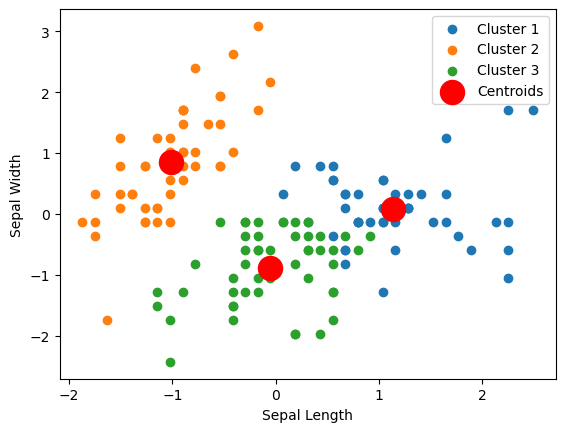

Predicted   0   1   2
Actual               
0           0  50   0
1          11   0  39
2          36   0  14


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Data Exploration
print(df.head())
print(df.describe())

# Data Preprocessing
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Apply k-means clustering 
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df_scaled)
df['cluster'] = clusters

# Visualize clusters
plt.scatter(df_scaled[clusters == 0, 0], df_scaled[clusters == 0, 1], label='Cluster 1')
plt.scatter(df_scaled[clusters == 1, 0], df_scaled[clusters == 1, 1], label='Cluster 2')
plt.scatter(df_scaled[clusters == 2, 0], df_scaled[clusters == 2, 1], label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

# Analyze results
comparison = pd.crosstab(iris.target, clusters, rownames=['Actual'], colnames=['Predicted'])
print(comparison)


* For k=3 
    * All data points for species 0 (setosa) were correctly identified as a separate cluster.
    * Species 1 (versicolor) had some overlap with species 2 (virginica):
        * 11 of the versicolor were clustered with virginica.
        * 36 of the virginica were clustered with versicolor.
* As the value of k changes:
    * For k=2, the algorithm grouped all species 1 (versicolor) and 2 (virginica) into one cluster, and species 0 (setosa) into another.
    * For k=4 and k=5, the clusters become more fragmented. This means that the algorithm starts to split the actual species into multiple clusters, which is an indication of overfitting, where the model finds patterns in the data that do not actually exist.
